# Day 3 PM - Inferential Statistics Part 2
## Implementation to Marketing Campaign Analysis

In this lesson, we will learn about hypothesis testing and how to implement it to a daily business case such as online retail. We will use the data from ML UCI dataset https://archive.ics.uci.edu/ml/datasets/online+retail.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('https://github.com/fahmimnalfrzki/Additional-Materials/blob/main/online_retail_data.xlsx?raw=true').drop(columns='Unnamed: 0').sort_values('InvoiceDate',ascending=True).reset_index(drop=True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom
...,...,...,...,...,...,...,...,...
9995,581501,22942,CHRISTMAS LIGHTS 10 SANTAS,12,2011-12-09 10:46:00,2.95,12985.0,United Kingdom
9996,581572,22627,MINT KITCHEN SCALES,4,2011-12-09 12:08:00,8.50,16705.0,United Kingdom
9997,581578,21507,ELEPHANT BIRTHDAY CARD,12,2011-12-09 12:16:00,0.42,12713.0,Germany
9998,581579,23353,6 GIFT TAGS VINTAGE CHRISTMAS,12,2011-12-09 12:19:00,0.83,17581.0,United Kingdom


### Single Sample Hypothesis Testing

Let we play a role. Suppose that during the last five years, our daily income is \$500 on average and during the last a year, we reach \$580 a day on average. Is it means that we're improved significantly?

In [3]:
data['income'] = data['Quantity']*data['UnitPrice']
data['date'] = data['InvoiceDate'].dt.date
daily_income = data[['date','income']].groupby('date').sum()
print('Average Income a Day for the last a year: ${}'.format(np.round(daily_income['income'].mean())))

Average Income a Day for the last a year: $580.0


To check that whether our sales is significantly increase or not, we will perform the single sample one sided to to that and set the significance level of 0.05. We use this method since we only test a variable and compare the sample (last a year data) and the population (we assume it is the last five years data).

Our hypothesis on this case:

**H0: μ =\$500**

**H1: μ > \$500**

In [4]:
t_stat,p_val = stats.ttest_1samp(daily_income.income, 500)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.002874549060119241
t-statistics: 2.7814828523345674


Since our p-value is less than 0.05, so we reject the null hypothesis and we can conclude that, our sales for the last a year is improved than the last five years. 

Note: T-statistics refers to how far the alternative hypothesis from null hypothesis away.

### Two Samples Independent Two Tailed Hypothesis Testing

Now, we want to check, whether daily average of sales of two countries are significantly different or not using two samples independent two tailed test. We will pick sample of France and Germany.

In [5]:
daily_france = data[data['Country']=='France'][['date','income']].groupby('date').sum().sample(90)
daily_germany = data[data['Country']=='Germany'][['date','income']].groupby('date').sum().sample(90)

print('Average sales of France a day: ${}'.format(np.round(daily_france.income.mean())))
print('Average sales of Germany a day: ${}'.format(np.round(daily_germany.income.mean())))

Average sales of France a day: $32.0
Average sales of Germany a day: $37.0


Our hypothesis on this case:

**H0: μ_france = μ_germany**

**H1: μ_france != μ_germany**

In [6]:
t_stat, p_val = stats.ttest_ind(daily_france,daily_germany)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.3988373334287433
t-statistics: -0.845732689400892


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


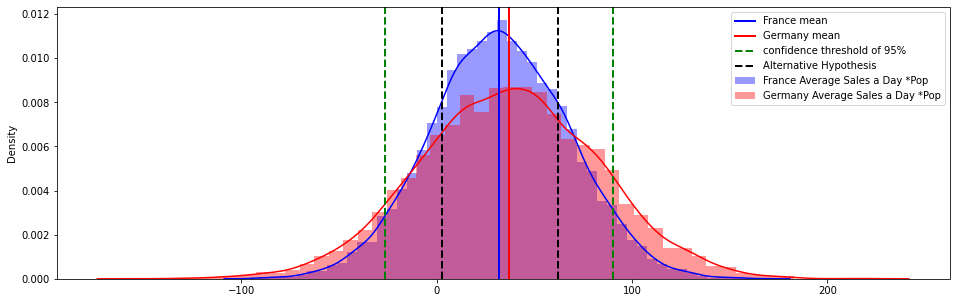

In [7]:
france_pop = np.random.normal(daily_france.income.mean(),daily_france.income.std(),10000)
germany_pop = np.random.normal(daily_germany.income.mean(),daily_germany.income.std(),10000)

ci = stats.norm.interval(0.90, daily_france.income.mean(), daily_france.income.std())
plt.figure(figsize=(16,5))
sns.distplot(france_pop, label='France Average Sales a Day *Pop',color='blue')
sns.distplot(germany_pop, label='Germany Average Sales a Day *Pop',color='red')

plt.axvline(daily_france.income.mean(), color='blue', linewidth=2, label='France mean')
plt.axvline(daily_germany.income.mean(), color='red',  linewidth=2, label='Germany mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(france_pop.mean()+t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(france_pop.mean()-t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Based on the result above, we can conclude that we accept the null hypothesis which between the france and germany are not significantly different in terms of average sales per day.

### Paired Test
**Implementation on A/B Testing**

We're dealing with the marketing division of game developer company to analyze which game version that tend to give more retention rate? Is it correct that we upgrade our game from gate 30 to gate 40 version? (Data from https://www.kaggle.com/yufengsui/mobile-games-ab-testing) We will use retention_1 data which capture the information that did the player come back and play 1 day after installing.

In [8]:
cookie_cats = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/cookie_cats.csv')
cookie_cats

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [9]:
gate_30 = cookie_cats[cookie_cats['version']=='gate_30']['retention_1'].replace({True:1,False:0})
gate_40 = cookie_cats[cookie_cats['version']=='gate_40']['retention_1'].replace({True:1,False:0})

print('Retention rate of gate 30 version:',gate_30.sum()/gate_30.count())
print('Retention rate of gate 40 version:',gate_40.sum()/gate_40.count())

Retention rate of gate 30 version: 0.4481879194630872
Retention rate of gate 40 version: 0.44228274967574577


The retention rate between those versions is slightly different. Is the difference truly the same or because of chance?

To make sure of our result, we will check using paired test two sided.

Our hypothesis on this case:

**H0: μ_gate30 = μ_gate40**

**H1: μ_gate30 != μ_gate40**

In [10]:
t_stat,p_val = stats.ttest_rel(gate_30.sample(40000),gate_40.sample(40000)) #we take 40000 sample of each data to make the size the same.
print('P-value:',p_val)

P-value: 0.1792549006612163


Since the p-value is more than 0.05, we conclude that we accept the Null hypothesis which means between gate 30 and 40 version is the same. We safely upgrade our game into gate 40 version.